- graphs with legend, coordinates, etc.
- anomaly computation
- anomly graph
- time-series

In [1]:
import datetime as dt
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import shapely

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import preprocessing as pp
import data_loading as data
import anomalies as an
import estimations as em
import visualize as vz

In [3]:
small_ticino = {'bbox': shapely.box(489152.05, 5029502.98, 494849.52, 5036759.13).bounds,
          'crs': data.CRS(32632)}

In [4]:
# test
crs = data.CRS(32632)

In [5]:
time_range = (dt.date(2017, 6, 1), dt.date(2017, 7, 1))

In [6]:
images = data.load_satellite_images(aoi=small_ticino, 
                                    time_range=time_range, 
                                    file_path=Path("small_test_data"), 
                                    show_progress=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 6660.65it/s]


In [7]:
ds = em.create_dataset(images[0])

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [8]:
lai = em.estimate_lai(ds)
cwc = em.estimate_cwc(ds)
ccc = em.estimate_ccc(ds)

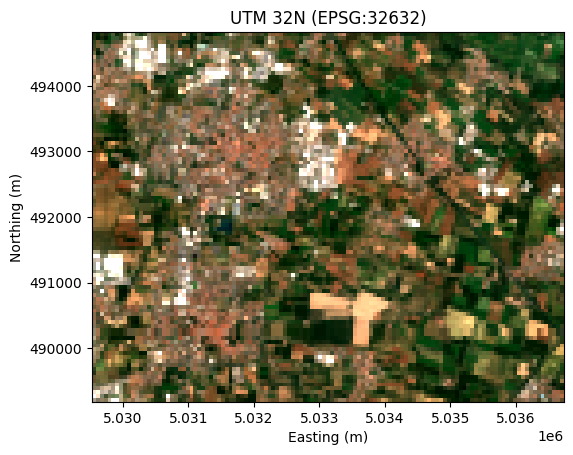

In [9]:
vz.plot_satellite_image(ds, crs)

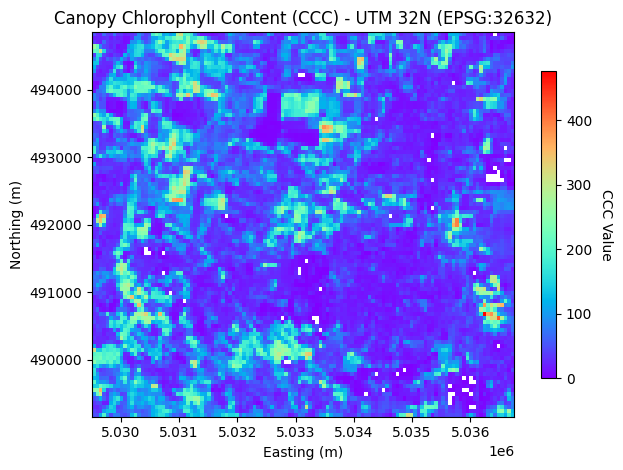

In [11]:
vz.plot_biophys_result(ccc, crs, "rainbow")